In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('/Users/apple/Desktop/Data science/datasets/train.csv')
test_data = pd.read_csv('/Users/apple/Desktop/Data science/datasets/test.csv')
# gender_submission = pd.read_csv('/Users/apple/Desktop/Data science/datasets/gender_submission.csv')

In [3]:
#drop unnecessary columns
train_data.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], inplace=True, axis=1)

In [4]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
train_data.describe()

/Users/apple/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


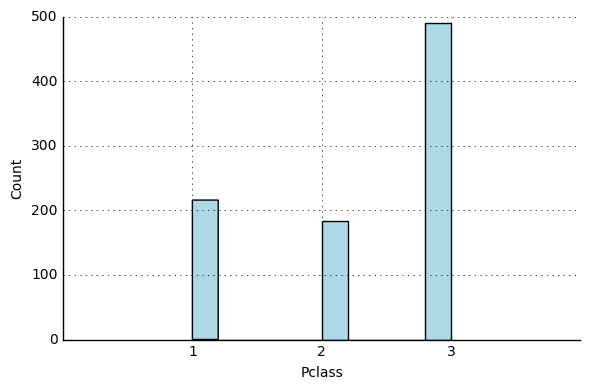

In [6]:
plt.hist(train_data['Pclass'], color='lightblue')
plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')
plt.xlim([0, 4])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks([1, 2, 3])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

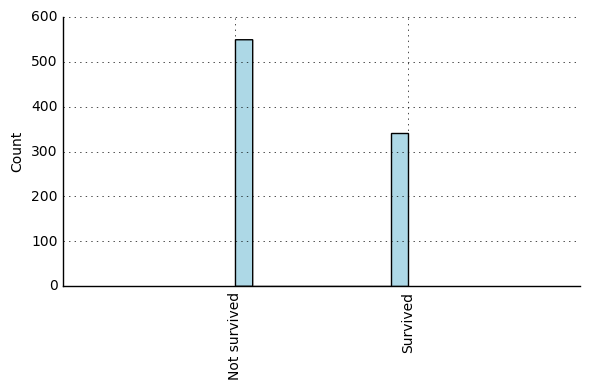

In [7]:
plt.hist(train_data['Survived'], color='lightblue')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.grid(True)
plt.xlim([-1, 2])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not survived', 'Survived'], rotation='vertical')
plt.ylabel('Count')
plt.tight_layout()

In [8]:
train_data['Pclass'].unique()

array([3, 1, 2])

In [9]:
y_surv = [len(train_data[((train_data['Survived'] == 1) & (train_data['Pclass'] == 1))]['Pclass'].tolist()), len(train_data[((train_data['Survived'] == 1) & (train_data['Pclass'] == 2))]['Pclass'].tolist()), len(train_data[((train_data['Survived'] == 1) & (train_data['Pclass'] == 3))]['Pclass'].tolist())]
y_not_surv = [len(train_data[((train_data['Survived'] == 0) & (train_data['Pclass'] == 1))]['Pclass'].tolist()), len(train_data[((train_data['Survived'] == 0) & (train_data['Pclass'] == 2))]['Pclass'].tolist()), len(train_data[((train_data['Survived'] == 0) & (train_data['Pclass'] == 3))]['Pclass'].tolist())]
y_surv , y_not_surv

([136, 87, 119], [80, 97, 372])

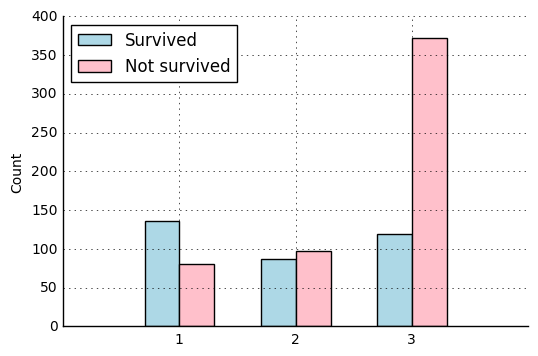

In [10]:
x = np.array([1, 2, 3])
width=0.3
fig, ax = plt.subplots()
bar1 = ax.bar(x - width, y_surv, width, color='lightblue', label='Survived')
bar2 = ax.bar(x, y_not_surv, width, color='pink', label='Not survived')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks([1, 2, 3])
plt.xlim([0, 4])
plt.ylabel('Count')
plt.grid(True)
plt.legend(loc='upper left')

In [11]:
sum(train_data['Age'].isnull()) / len(train_data)

0.19865319865319866

In [12]:
sum(train_data[train_data['Survived']==1]['Age'].isnull()) / len(train_data)

0.058361391694725026

In [13]:
sum(train_data[train_data['Survived']==0]['Age'].isnull()) / len(train_data)

0.14029180695847362

In [14]:
mean_age = np.mean(train_data['Age'])
train_data['Age'] = train_data['Age'].fillna(mean_age)

In [15]:
train_data['Age_group'] = pd.cut(train_data['Age'], 10)

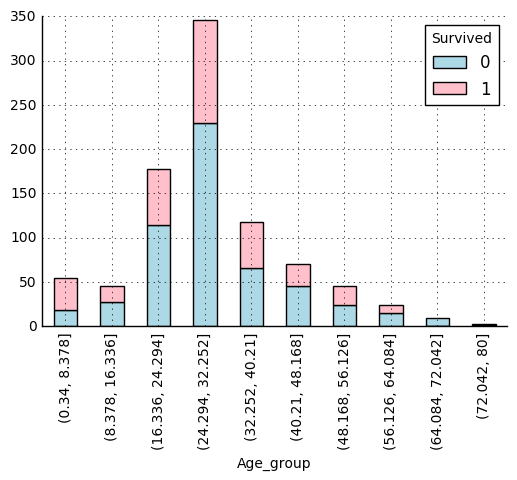

In [16]:
counts = train_data.groupby(['Age_group', 'Survived']).Age_group.count().unstack()
# plt.bar(counts['', stacked=True, color=['lightblue', 'pink'])
counts.plot(kind='bar', stacked=True, color=['lightblue', 'pink'])
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.grid(True)

In [17]:
sum(train_data['Embarked'].isnull())

2

In [18]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [20]:
y_surv_2 = [len(train_data[((train_data['Survived'] == 1) & (train_data['Embarked'] == 'S'))]['Embarked'].tolist()), len(train_data[((train_data['Survived'] == 1) & (train_data['Embarked'] == 'C'))]['Embarked'].tolist()), len(train_data[((train_data['Survived'] == 1) & (train_data['Embarked'] == 'Q'))]['Embarked'].tolist())]
y_not_surv_2 = [len(train_data[((train_data['Survived'] == 0) & (train_data['Embarked'] == 'S'))]['Embarked'].tolist()), len(train_data[((train_data['Survived'] == 0) & (train_data['Embarked'] == 'C'))]['Embarked'].tolist()), len(train_data[((train_data['Survived'] == 0) & (train_data['Embarked'] == 'Q'))]['Embarked'].tolist())]
y_surv_2 , y_not_surv_2

([219, 93, 30], [427, 75, 47])

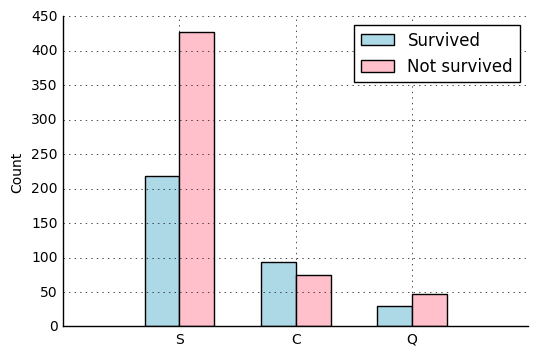

In [21]:
x = np.array([1, 2, 3])
width=0.3
fig, ax = plt.subplots()
bar1 = ax.bar(x - width, y_surv_2, width, color='lightblue', label='Survived')
bar2 = ax.bar(x, y_not_surv_2, width, color='pink', label='Not survived')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['S', 'C', 'Q'])
plt.xlim([0, 4])
plt.ylabel('Count')
plt.grid(True)
plt.legend(loc='upper right')

In [22]:
# This makes the model worse
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# train_data[['Fare', 'Age']] = sc.fit_transform(train_data[['Fare', 'Age']])

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [24]:
labelEncoder_sex = LabelEncoder()
train_data['Sex'] = labelEncoder_sex.fit_transform(train_data['Sex'])

In [25]:
labelEncoder_embarked = LabelEncoder()
train_data['Embarked'] = labelEncoder_embarked.fit_transform(train_data['Embarked'])

In [26]:
train_data.drop(['Age_group'], inplace=True, axis=1)

In [27]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [28]:
X = train_data.iloc[:, 1:8].values
y = train_data['Survived'].values

In [29]:
oneHotEncoder = OneHotEncoder(categorical_features=[0, 6])
X = oneHotEncoder.fit_transform(X).toarray()

In [30]:
# avoiding the dummy variable trap
X = X[:, [1, 2, 3, 4, 6, 7, 8, 9, 10]]

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
#prepare the test data
# test_data_cp = test_data.copy()
# test_data_cp.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], inplace=True, axis=1)
# test_data_cp['Age'] = test_data_cp['Age'].fillna(mean_age)
# test_data_cp['Embarked'] = test_data_cp['Embarked'].fillna('S')

In [34]:
# test_data_cp.describe()

In [35]:
# mean_fare = np.mean(train_data['Fare'])
# test_data_cp['Fare'] = test_data_cp['Fare'].fillna(mean_fare)
# train_data[['Fare', 'Age']] = sc.fit_transform(train_data[['Fare', 'Age']])

In [36]:
# test_data_cp['Sex'] = labelEncoder_sex.transform(test_data_cp['Sex'])
# test_data_cp['Embarked'] = labelEncoder_embarked.transform(test_data_cp['Embarked'])

# X_test = test_data_cp.iloc[:, :].values
# y_test = gender_submission['Survived'].values

# X_test = oneHotEncoder.transform(X_test).toarray()

# X_test = X_test[:, [1, 2, 3, 4, 6, 7, 8, 9, 10]]

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[118,  21],
       [ 25,  59]])

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[115,  24],
       [ 27,  57]])

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[108,  31],
       [ 21,  63]])

In [42]:
#logistic regression seems the best